# ETrade CSV Parser Demo

This notebook demonstrates how to use the portfolio_analysis library to parse ETrade CSV files and extract useful position data.

The library uses Pydantic for data validation and pandas for efficient CSV parsing.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from portfolio_analysis import parse_etrade_csv

In [2]:
# Set seaborn style for better looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.style.use("seaborn-v0_8")

In [3]:
# Path to the ETrade CSV file
csv_path = "../in/PortfolioDownload.csv"

print(f"Parsing: {csv_path}")

Parsing: ../in/PortfolioDownload.csv


The `parse_etrade_csv()` function provides a quick way to get all the data at once.

In [4]:
# Parse the CSV using the convenience function
positions_df, lots_df, cash_position, portfolio_summary = parse_etrade_csv(csv_path)

print(f"Cash Position: ${cash_position:,.2f}")
print(f"\nPortfolio Summary:")
for key, value in portfolio_summary.items():
    if isinstance(value, float):
        if "dollar" in key or "value" in key:
            print(f"  {key}: ${value:,.2f}")
        else:
            print(f"  {key}: {value:.2f}")
    else:
        print(f"  {key}: {value}")

2025-05-24 00:47:21,346| INFO | portfolio_analysis.parsing.etrade.parse:72 - Parsing ETrade CSV: ../in/PortfolioDownload.csv
2025-05-24 00:47:21,354| INFO | portfolio_analysis.parsing.etrade.parse:147 - Parsed 17 positions, 305 lots, cash: $0.61


Cash Position: $0.61

Portfolio Summary:
  total_value: $230,094.35
  total_position_value: $230,093.74
  cash_position: 0.61
  number_of_positions: 17
  total_gain_dollar: $78,779.67
  average_gain_percent: 62.43


In [5]:
lots_df

,symbol,purchase_date,last_price,change_dollar,change_percent,quantity,price_paid,days_gain,total_gain_dollar,total_gain_percent,value,total_cost
0,AAPL,2022-07-29,195.27,-6.09,-3.02,20.000,162.6585,-121.80000,652.230000,20.049060,3905.40000,3253.170000
1,AAPL,2022-08-11,195.27,-6.09,-3.02,0.027,170.3704,-0.16443,0.672289,14.614980,5.27229,4.600001
2,AAPL,2022-11-10,195.27,-6.09,-3.02,0.032,144.0625,-0.19488,1.638640,35.545336,6.24864,4.610000
3,AAPL,2022-12-20,195.27,-6.09,-3.02,14.000,132.2279,-85.26000,882.589400,47.676852,2733.78000,1851.190600
4,AAPL,2023-02-16,195.27,-6.09,-3.02,0.051,153.5294,-0.31059,2.128771,27.187366,9.95877,7.829999
...,...,...,...,...,...,...,...,...,...,...,...,...
300,VTI,2025-03-27,285.04,-1.68,-0.59,4.000,279.4600,-6.72000,22.320000,1.996708,1140.16000,1117.840000
301,VTI,2025-03-31,285.04,-1.68,-0.59,0.334,274.6108,-0.56112,3.483353,3.797811,95.20336,91.720007
302,VTI,2025-04-23,285.04,-1.68,-0.59,4.000,263.4475,-6.72000,86.370000,8.196130,1140.16000,1053.790000
303,VTI,2025-05-07,285.04,-1.68,-0.59,4.000,274.9650,-6.72000,40.300000,3.664103,1140.16000,1099.860000


## Positions Analysis

Let's examine the positions, starting with the largest holdings by value.

In [6]:
if positions_df is not None and not positions_df.empty:
    print("=== Top 10 Positions by Value ===")
    top_positions = positions_df.nlargest(10, "value")
    display(
        top_positions[["symbol", "quantity", "last_price", "value", "total_gain_percent"]].round(2)
    )
else:
    print("No positions found")

=== Top 10 Positions by Value ===


,symbol,quantity,last_price,value,total_gain_percent
13,QQQM,158.68,209.66,33269.48,8.14
10,MSFT,72.83,450.18,32786.16,113.91
16,VTI,109.41,285.04,31187.08,15.86
3,AMZN,150.00,200.99,30148.50,66.23
12,QQQ,56.40,509.24,28719.10,57.97
7,GOOGL,138.65,168.47,23358.03,124.84
0,AAPL,48.58,195.27,9485.83,22.05
15,V,19.74,353.54,6980.65,105.18
11,NVDA,51.03,131.29,6699.47,157.45
5,COST,6.21,1008.50,6266.82,89.11


In [7]:
if positions_df is not None and not positions_df.empty:
    print("=== Top 5 Gainers by Percentage ===")
    top_gainers = positions_df.nlargest(5, "total_gain_percent")
    for _, row in top_gainers.iterrows():
        print(
            f"{row['symbol']}: {row['total_gain_percent']:.2f}% (${row['total_gain_dollar']:,.2f})"
        )
else:
    print("No positions found")

=== Top 5 Gainers by Percentage ===
NVDA: 157.45% ($4,097.18)
GOOGL: 124.84% ($12,969.22)
MSFT: 113.91% ($17,459.23)
MA: 108.19% ($2,417.35)
V: 105.18% ($3,578.47)


## Portfolio Visualization

Let's create some simple visualizations of the portfolio data.

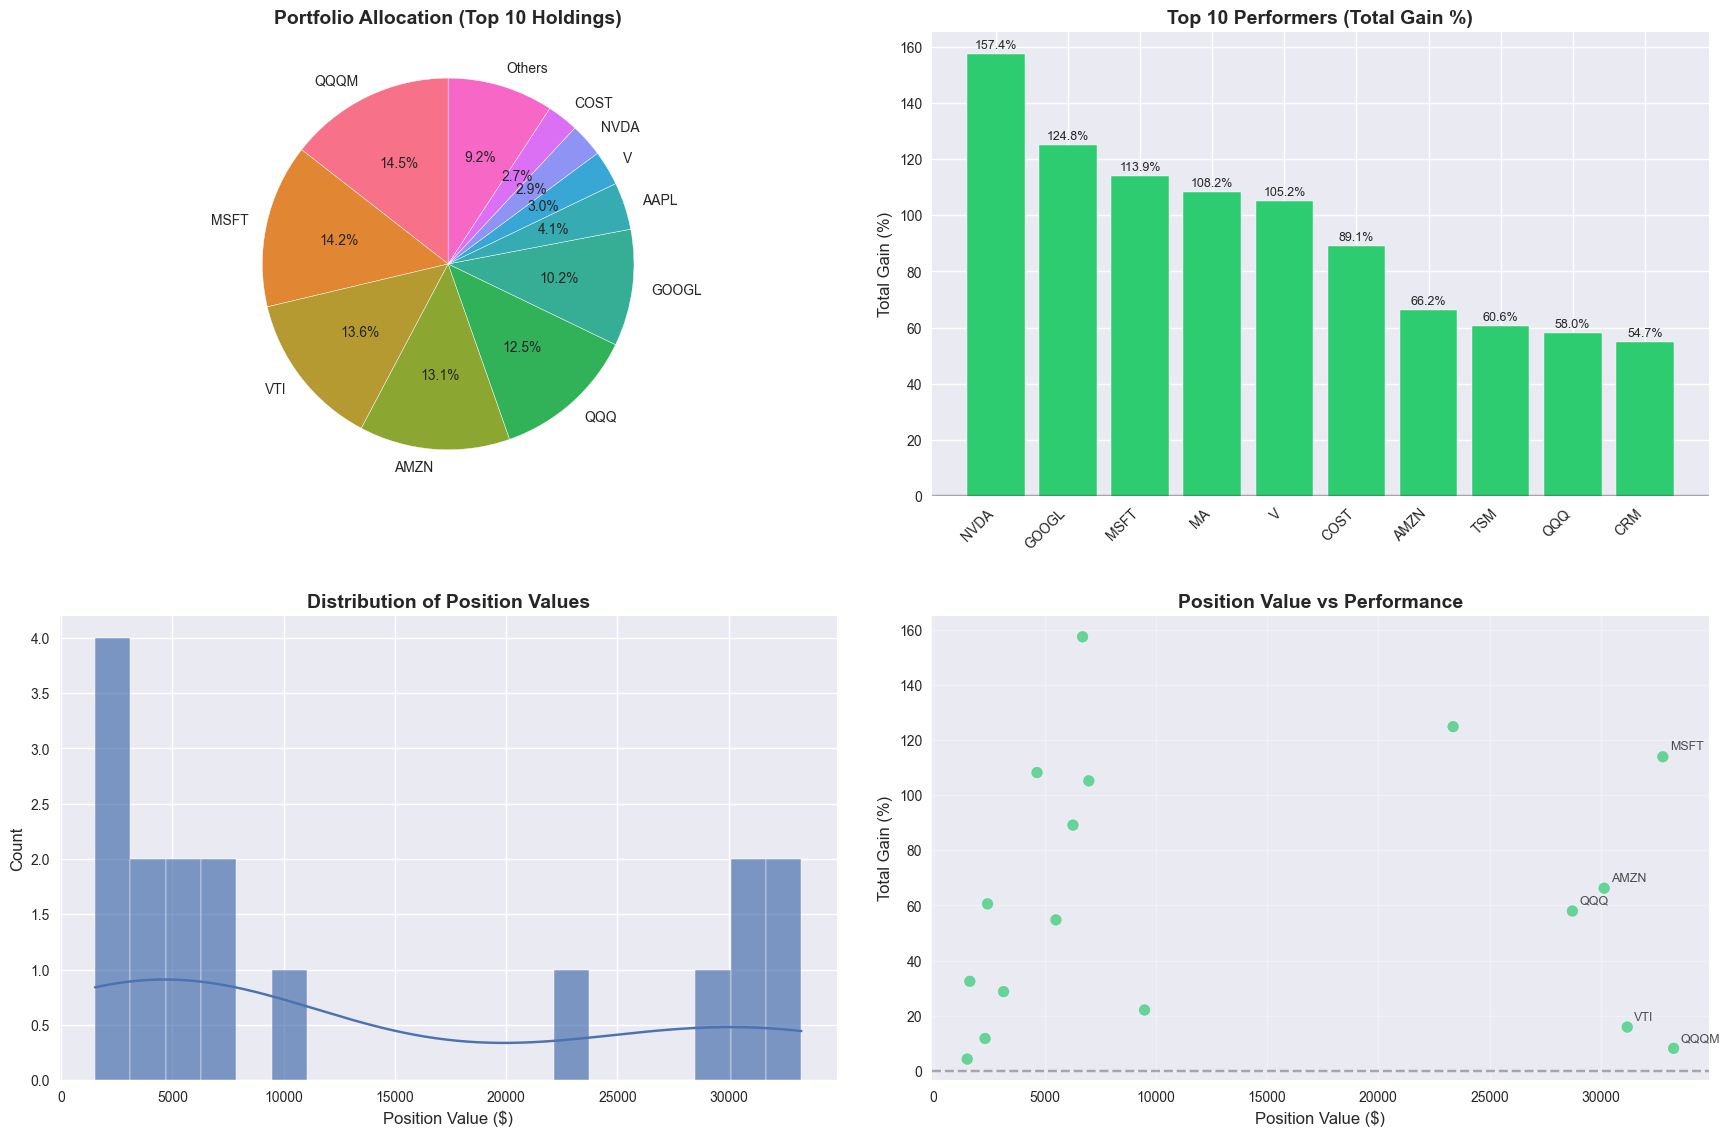


PORTFOLIO PERFORMANCE SUMMARY
📊 Total Portfolio Value: $230,094.35
💰 Total Unrealized Gain: $78,779.67
📈 Winning Positions: 17 (100.0%)
📉 Losing Positions: 0 (0.0%)
💵 Cash Position: $0.61 (0.0% of portfolio)


In [8]:
if positions_df is not None and not positions_df.empty:
    # Create subplots with seaborn styling
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

    # 1. Portfolio allocation pie chart
    top_10 = positions_df.nlargest(10, "value")
    other_value = positions_df["value"].sum() - top_10["value"].sum()

    if other_value > 0:
        pie_data = list(top_10["value"]) + [other_value]
        pie_labels = list(top_10["symbol"]) + ["Others"]
    else:
        pie_data = top_10["value"]
        pie_labels = top_10["symbol"]

    # Use seaborn color palette for pie chart
    colors = sns.color_palette("husl", len(pie_data))
    ax1.pie(pie_data, labels=pie_labels, autopct="%1.1f%%", colors=colors, startangle=90)
    ax1.set_title("Portfolio Allocation (Top 10 Holdings)", fontsize=14, fontweight="bold")

    # 2. Performance bar chart
    gains_losses = positions_df.sort_values("total_gain_percent", ascending=False).head(10)

    # Create color map for gains/losses
    palette = ["#2ecc71" if x > 0 else "#e74c3c" for x in gains_losses["total_gain_percent"]]

    bars = ax2.bar(range(len(gains_losses)), gains_losses["total_gain_percent"], color=palette)
    ax2.set_xticks(range(len(gains_losses)))
    ax2.set_xticklabels(gains_losses["symbol"], rotation=45, ha="right")
    ax2.set_ylabel("Total Gain (%)", fontsize=12)
    ax2.set_title("Top 10 Performers (Total Gain %)", fontsize=14, fontweight="bold")
    ax2.axhline(y=0, color="black", linestyle="-", alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, gains_losses["total_gain_percent"]):
        height = bar.get_height()
        ax2.text(
            bar.get_x() + bar.get_width() / 2.0,
            height + (1 if height > 0 else -3),
            f"{value:.1f}%",
            ha="center",
            va="bottom" if height > 0 else "top",
            fontsize=9,
        )

    # 3. Position value distribution
    sns.histplot(data=positions_df, x="value", bins=20, ax=ax3, kde=True, alpha=0.7)
    ax3.set_xlabel("Position Value ($)", fontsize=12)
    ax3.set_ylabel("Count", fontsize=12)
    ax3.set_title("Distribution of Position Values", fontsize=14, fontweight="bold")
    ax3.ticklabel_format(style="plain", axis="x")

    # 4. Gain/Loss scatter plot
    scatter_colors = ["#2ecc71" if x > 0 else "#e74c3c" for x in positions_df["total_gain_percent"]]
    ax4.scatter(
        positions_df["value"], positions_df["total_gain_percent"], c=scatter_colors, alpha=0.7, s=60
    )

    # Add symbol labels for largest positions
    top_5_positions = positions_df.nlargest(5, "value")
    for _, row in top_5_positions.iterrows():
        ax4.annotate(
            row["symbol"],
            (row["value"], row["total_gain_percent"]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=9,
            alpha=0.8,
        )

    ax4.set_xlabel("Position Value ($)", fontsize=12)
    ax4.set_ylabel("Total Gain (%)", fontsize=12)
    ax4.set_title("Position Value vs Performance", fontsize=14, fontweight="bold")
    ax4.axhline(y=0, color="black", linestyle="--", alpha=0.3)
    ax4.grid(True, alpha=0.3)

    plt.tight_layout(pad=3.0)
    plt.show()

    # Additional summary statistics
    print("\n" + "=" * 50)
    print("PORTFOLIO PERFORMANCE SUMMARY")
    print("=" * 50)

    total_value = positions_df["value"].sum() + cash_position
    total_gain = positions_df["total_gain_dollar"].sum()
    winners = len(positions_df[positions_df["total_gain_percent"] > 0])
    losers = len(positions_df[positions_df["total_gain_percent"] < 0])

    print(f"📊 Total Portfolio Value: ${total_value:,.2f}")
    print(f"💰 Total Unrealized Gain: ${total_gain:,.2f}")
    print(f"📈 Winning Positions: {winners} ({winners/len(positions_df)*100:.1f}%)")
    print(f"📉 Losing Positions: {losers} ({losers/len(positions_df)*100:.1f}%)")
    print(
        f"💵 Cash Position: ${cash_position:,.2f} ({cash_position/total_value*100:.1f}% of portfolio)"
    )

else:
    print("No data available for visualization")